In [1]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels import regression, stats 

# Data Preperation
gathering data using pandas datareader and yahoo finance

In [2]:
start = datetime(2019,1,1)
end = datetime.today()

stocks = pdr.get_data_yahoo(['TSLA', 'NIO','HYLN','F','GM','HMC'],start,end)
stocks.head()

Attributes  Adj Close                                                 Close  \
Symbols          TSLA   NIO HYLN         F         GM        HMC       TSLA   
Date                                                                          
2019-01-02  62.023998  6.20  NaN  7.284280  31.893360  26.480000  62.023998   
2019-01-03  60.071999  6.05  NaN  7.173633  30.575533  26.120001  60.071999   
2019-01-04  63.537998  6.36  NaN  7.450252  31.599455  27.309999  63.537998   
2019-01-07  66.991997  6.50  NaN  7.643884  32.575977  27.820000  66.991997   
2019-01-08  67.070000  6.40  NaN  7.717649  33.002617  28.480000  67.070000   

Attributes                   ... Open                                  Volume  \
Symbols      NIO HYLN     F  ... HYLN     F         GM        HMC        TSLA   
Date                         ...                                                
2019-01-02  6.20  NaN  7.90  ...  NaN  7.53  32.849998  26.110001  58293000.0   
2019-01-03  6.05  NaN  7.78  ...  NaN  7.97  33.340000  26.400000  34826000.0   
2019-01-04  6.36  NaN  8.08  ...  NaN  7.91  32.799999  26.760000  36970500.0   
2019-01-07  6.50  NaN  8.29  ...  NaN  8.11  33.709999  27.540001  37756000.0   
2019-01-08  6.40  NaN  8.37  ...  NaN  8.42  35.000000  28.570000  35042500.0   

Attributes                                                    
Symbols           NIO HYLN           F          GM       HMC  
Date                                                          
2019-01-02  8823600.0  NaN  47494400.0   7662300.0  655900.0  
2019-01-03  7562900.0  NaN  39172400.0  11618300.0  937000.0  
2019-01-04  9405600.0  NaN  43039800.0  10784000.0  826300.0  
2019-01-07  9709000.0  NaN  40729400.0  10722300.0  806700.0  
2019-01-08  9603800.0  NaN  45644000.0  10532900.0  949400.0  

[5 rows x 36 columns]

# Data Processing

In [3]:
adj_close = stocks['Adj Close']
adj_close.head()

Symbols,TSLA,NIO,HYLN,F,GM,HMC
Date,,,,,,
2019-01-02,62.023998,6.20,NaN,7.284280,31.893360,26.480000
2019-01-03,60.071999,6.05,NaN,7.173633,30.575533,26.120001
2019-01-04,63.537998,6.36,NaN,7.450252,31.599455,27.309999
2019-01-07,66.991997,6.50,NaN,7.643884,32.575977,27.820000
2019-01-08,67.070000,6.40,NaN,7.717649,33.002617,28.480000


In [4]:
close_train = adj_close.loc['2019-01-01':'2021-01-01']
close_test = adj_close.loc['2021-01-02':'2021-08-28']

In [5]:
close_train = close_train.dropna()

tsla_ret = np.log(close_train['TSLA'])
nio_ret = np.log(close_train['NIO'])
hyln_ret = np.log(close_train['HYLN'])
f_ret = np.log(close_train['F'])
gm_ret =  np.log(close_train['GM'])
hmc_ret = np.log(close_train['HMC'])

slr_tsla = regression.linear_model.OLS(nio_ret, sm.add_constant(tsla_ret)).fit()
slr_pred_tsla = slr_tsla.params[0] + slr_tsla.params[1]*tsla_ret

mlr = regression.linear_model.OLS(nio_ret, sm.add_constant(np.column_stack((tsla_ret, hyln_ret, f_ret, gm_ret, hmc_ret)))).fit()
mlr_pred = mlr.params[0] + mlr.params[1]*tsla_ret + mlr.params[2]*hyln_ret + mlr.params[3]*f_ret + mlr.params[4]*gm_ret + mlr.params[5]*hmc_ret
print('SLR: R-Squared:', slr_tsla.rsquared_adj)
print('MLR: R Squared:', mlr.rsquared_adj)

SLR: R-Squared: 0.9195343757740322
MLR: R Squared: 0.9442635779346608


C:\Users\raamt\anaconda3\envs\Env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


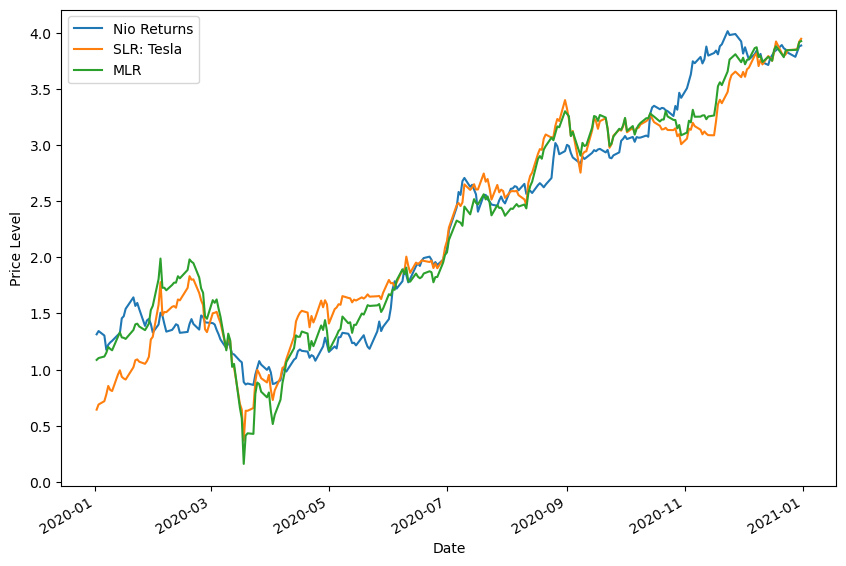

In [10]:
plt.figure(figsize=(10,7))
nio_ret.plot()
slr_pred_tsla.plot()
mlr_pred.plot()
plt.legend(['Nio Returns','SLR: Tesla','MLR'])
plt.xlabel('Date')
plt.ylabel('Price Level')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                    NIO   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     2881.
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          1.44e-139
Time:                        20:19:11   Log-Likelihood:                -38.935
No. Observations:                 253   AIC:                             81.87
Df Residuals:                     251   BIC:                             88.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3521      0.162    -39.299      0.0

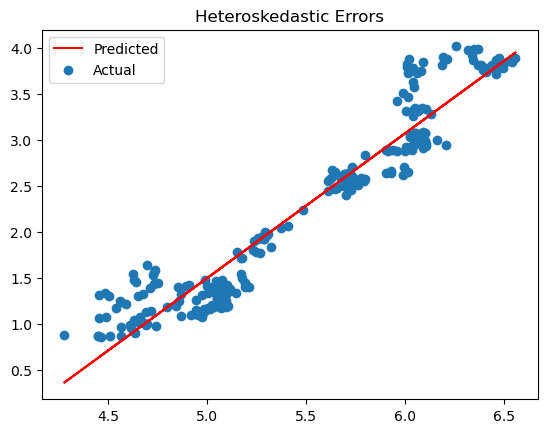

In [11]:
plt.scatter(tsla_ret, nio_ret)
plt.plot(tsla_ret, slr_pred_tsla, color='red')
plt.title('Heteroskedastic Errors')
plt.legend(['Predicted', 'Actual'])

print(slr_tsla.summary())
plt.show()